## Connecting to MS SQL Server from python

#### Required libraries

`pyodbc` - in order to form a connection to the database

`sqlalchemy` - object relational mapper (converts a pandas DataFrame to a SQL table)

#### Process

Once these libraries are installed and imported, we need to connect to the sql server. Just how we need to provide the path of a file to connect to it, we need to provide the following specifications to connect to a sql server.

`server name`: it has the host (the machine in which the server is running) and the name of the server.

`database name`

`user name` **(if applicable)**

`password` **(if applicable)**

we provide these things as a connection string.

In [29]:
import pyodbc
from sqlalchemy import create_engine
import pandas as pd

# Replace these variables with your actual SQL Server connection details
server_name = "localhost\SQLEXPRESS"    ## you can check this server_name in the opening window of ssms
database_name = "capstone1"            ## provide your database name

## Username and password below are not required if using windows authentication.

#username = "your_username"
#password = "your_password"

# Connection string
# connection_string = (
#     f"DRIVER={{ODBC Driver 17 for SQL Server}};"
#     f"SERVER={server_name};DATABASE={database_name};"
#     "Trusted_Connection=yes;"
# )


## the server_name, data_base name and connection library provided as a connection string
connection_string = f"mysql+pyodbc://@{server_name}/{database_name}?driver=ODBC+Driver+17+for+SQL+Server"

In [23]:
## connect to the database

#connection = pyodbc.connect(connection_string)
connection2 = create_engine(connection_string)

In [24]:
## define the query
query = f"SELECT * FROM employees"

# Read data using pandas
data_frame = pd.read_sql(query, connection2)

In [25]:
data_frame

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,1,C,False,None
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,9,A,False,None
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,2,C,False,None
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,6,B,False,None
...,...,...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,9,C,False,None
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,10,A,False,None
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,8,B,False,None
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,1,B,False,None


In [30]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   emp_no                   300024 non-null  int64 
 1   emp_title_id             300024 non-null  object
 2   birth_date               300024 non-null  object
 3   first_name               300024 non-null  object
 4   last_name                300024 non-null  object
 5   sex                      300024 non-null  object
 6   hire_date                300024 non-null  object
 7   no_of_projects           300024 non-null  int64 
 8   Last_performance_rating  300024 non-null  object
 9   left                     300024 non-null  bool  
 10  last_date                29867 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 23.2+ MB


<AxesSubplot:>

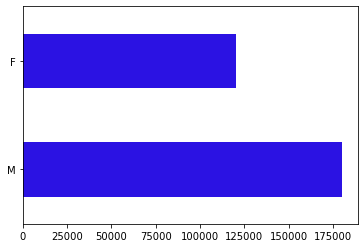

In [33]:
data_frame.sex.value_counts().plot(kind='barh', color=[43/255, 18/255, 227/255])

### Write to database

In [27]:
## write to database

data = {
        "ID": [1, 2, 3],
        "Name": ["John", "Alice", "Bob"],
        "Age": [30, 25, 28]
    }



df = pd.DataFrame(data)

In [28]:
df

,ID,Name,Age
0,1,John,30
1,2,Alice,25
2,3,Bob,28


In [18]:
## write to server

df.to_sql('temp_df', connection2, if_exists='append')